<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/Group6_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Gun Death

## Group Members:

Arun Kuinkel

Avigail Spira

Cindy Juan

Dean Loeafoe

## **Power Point Slides**
https://cuny-my.sharepoint.com/:p:/g/personal/arun_kuinkel75_qmail_cuny_edu/EYKLbqk9uddLpPo0dY1PDNQBA-z_Sl-Tx__cCqrn5meuHQ?rtime=H67TiWNa2kg

## **Part 1 - Introduction**

According to pewresearch.org, suicides account for 54% of gun related deaths in 2020. Gun ownership has been a tumultuous issue in America for decades. This problem is exacerbated by the constant disagreement between states and politicians when it comes to the issue of legal gun ownership. This has led to very loose gun ownership and acquisition laws. This in turn makes it easier for one to commit suicide by shooting themselves. Aside from improving gun legislation, it could be possible to use a predictive model to identify contributing factors that would lead one to commit suicide by shooting. We will use gun death data from 2012 to 2014 in an attempt to create such a model.

This data was originally taken from the Centres for Desease Control and Prevention's "Multiple Cause of Death database", which is derived form death certificates from all 50 states and the District of Columbia. This data set does not include the gun related deaths of non-U.S. residents which was about 50 per year at the time.

### **Research Approach**
We will attempt to create various classification models that will either classify a gun death as a suicide or not. Once we pick the model with the best performance metrics, we will then look at the attributes that contributed the most to that model's success. This will be accomplished by creating multiple logistic models created from different features selected with varying methods, decision tree regression and an ensemble model built from the previously created logit models.

### **Statement of Problem**
Is it possible to create a classification model that accurately identify factors that contributes to one commiting suicide through shooting?

## **Part 2 - Data Summary**

The attributes provide us with the framework in which the given data is analyzed. Each attribute have some meaning, which can be used in different ways during our analysis.

Following are a brief explanations of different attributes:

- Year - year that the incident took place

- Month	- month in which the incident took place

- Intent - intention of incident, which are  Suicide, Accidental, Homicide, Undetermined, or Unknown

- Police - police shooting

- Gender - gender of the victim

- Age	- Age of the victim

- Race - race or ethnicity of the victim

- Heritage - Hispanic between 199-996 excluding, White 01, Black 02, Asia/Pacific Islander, Native American/Native Alaskan between 4 - 78 inclusive

- Place	- location of incident

- Education - educational status of the victim, which is categorized as Less than High School (HS), HS/GED, Some college, BA+

In [ ]:
# data is downloaded from https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/full_data.csv

import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# uploading data to pandas
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/full_data.csv')

#prints few lines of the sample table including the header 
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [ ]:
df.tail() #Confirming all rows are in the dataframe

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
100793,100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100794,100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100795,100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED
100796,100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,Less than HS
100797,100798,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,HS/GED


#### Assigning column names
The column names appear to be on  the first row of the data set. We are dropping the first row where the column names appear and the first column with the serial number. Also assigning column names. 

In [ ]:
# delete column 0, which appears to be a serial number 
del df['Unnamed: 0']

df = df.drop(0)

# assign meaningful column names on the column section
df.columns = ['Year', 'Month', 'Intent', 'Police', 'Gender', 'Age', 'Race', 'Heritage', 'Place', 'Education']

#sample output of data
df.head()

,Year,Month,Intent,Police,Gender,Age,Race,Heritage,Place,Education
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
5,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,Less than HS


In [ ]:
# general statistics prior to any alterations being made
df.describe()

,Year,Month,Police,Age,Heritage
count,100797.000000,100797.000000,100797.000000,100779.000000,100797.000000
mean,2013.000367,6.567656,0.013909,43.857699,114.179747
std,0.816276,3.405581,0.117115,19.496253,61.596023
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


## **Part 3: Data preparation**
In this section, we will search for and handle any values that are unexpected or do not provide information to the data set.

In [ ]:
#check how many values are null in each column
df.isnull().sum()

Year            0
Month           0
Intent          1
Police          0
Gender          0
Age            18
Race            0
Heritage        0
Place        1384
Education    1422
dtype: int64

It would appear that there are null values in 4 of the columns. We opted to drop the rows with null values since comparitively, the amount of nulls in the columns is small. 1422 out of 10797 rows is small relatively speaking. We opted to drop these rows instead of filling them with values since this is categorical data that is the result of factual records.

In [ ]:
#drop the rows with Null values
df.dropna(subset = ["Age"], inplace=True)
df.dropna(subset = ['Intent'], inplace = True)
df.dropna(subset = ["Place"], inplace=True)
df.dropna(subset = ['Education'], inplace = True)

#Double check to confirm all Null values are gone
df.isnull().sum()

Year         0
Month        0
Intent       0
Police       0
Gender       0
Age          0
Race         0
Heritage     0
Place        0
Education    0
dtype: int64

In [ ]:
#Check how many rows remain after deletions
df.shape

(98014, 10)

In the next section of Data preparation, we will check for any other odd values that remain such as quesion marks or negative numbers in places where they should not exist.

In [ ]:
#Year
temp =  df['Year'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([2012, 2013, 2014])

In [ ]:
#Month
temp =  df['Month'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
#Intent
temp =  df['Intent'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['Accidental', 'Homicide', 'Suicide', 'Undetermined'], dtype=object)

In [ ]:
#Police
temp =  df['Police'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0, 1])

In [ ]:
#Gender
temp =  df['Gender'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['F', 'M'], dtype=object)

In [ ]:
#Age
temp =  df['Age'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 101., 102., 107.])

In [ ]:
#Race
temp =  df['Race'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['Asian/Pacific Islander', 'Black', 'Hispanic',
       'Native American/Native Alaskan', 'White'], dtype=object)

In [ ]:
#Heritage
temp =  df['Heritage'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([100, 200, 209, 210, 211, 212, 217, 218, 220, 221, 222, 223, 224,
       225, 226, 227, 231, 232, 233, 234, 235, 237, 238, 239, 242, 250,
       252, 260, 261, 270, 271, 275, 280, 281, 282, 286, 291, 299, 998])

The heritage column generated a lot of unique values, all of which were not clearly explained. Since we already have race which is an adequate way of classifying individuals, we opted to drop this column. Dealing with this many ambiguous categories is messy.

In [ ]:
#Drop Heritage column
del df['Heritage']

In [ ]:
#Place
temp =  df['Place'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['Farm', 'Home', 'Industrial/construction', 'Other specified',
       'Other unspecified', 'Residential institution',
       'School/instiution', 'Sports', 'Street', 'Trade/service area'],
      dtype=object)

In [ ]:
#Education
temp =  df['Education'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['BA+', 'HS/GED', 'Less than HS', 'Some college'], dtype=object)

### Part 4 - Data Visualization

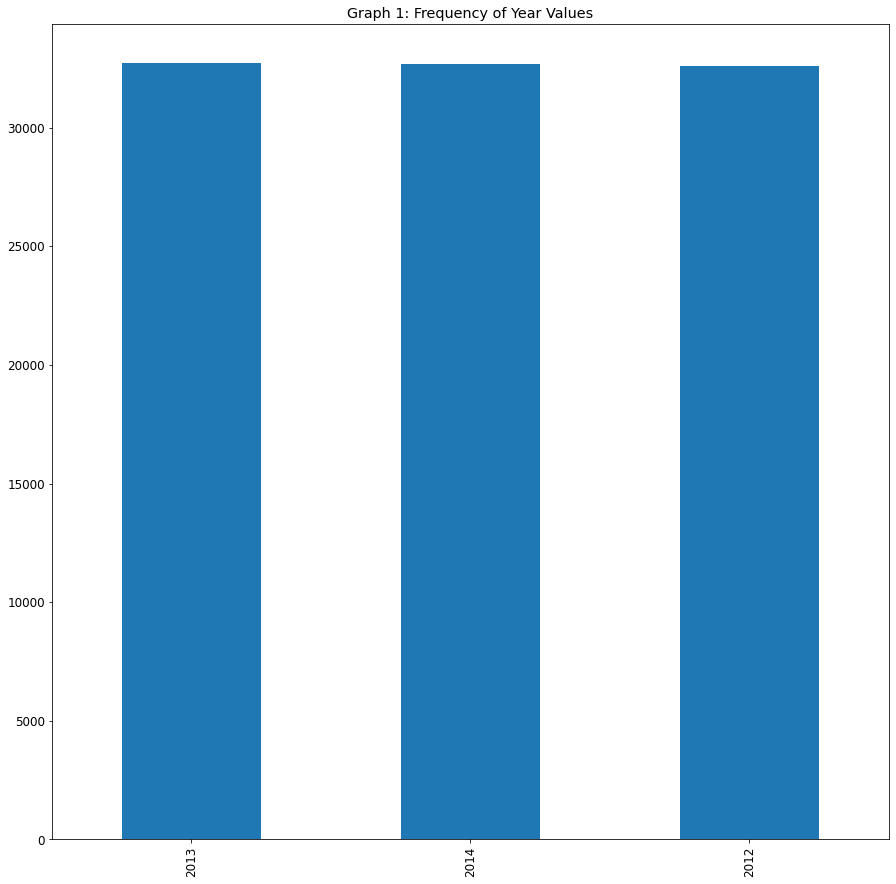

In [ ]:
bplt = df['Year'].value_counts().plot.bar(title = "Graph 1: Frequency of Year Values")

There is a fairly even distribution of gun deaths throughout the 3 years covered in the data. This indicates that gun related deaths occur quite regularly in America.

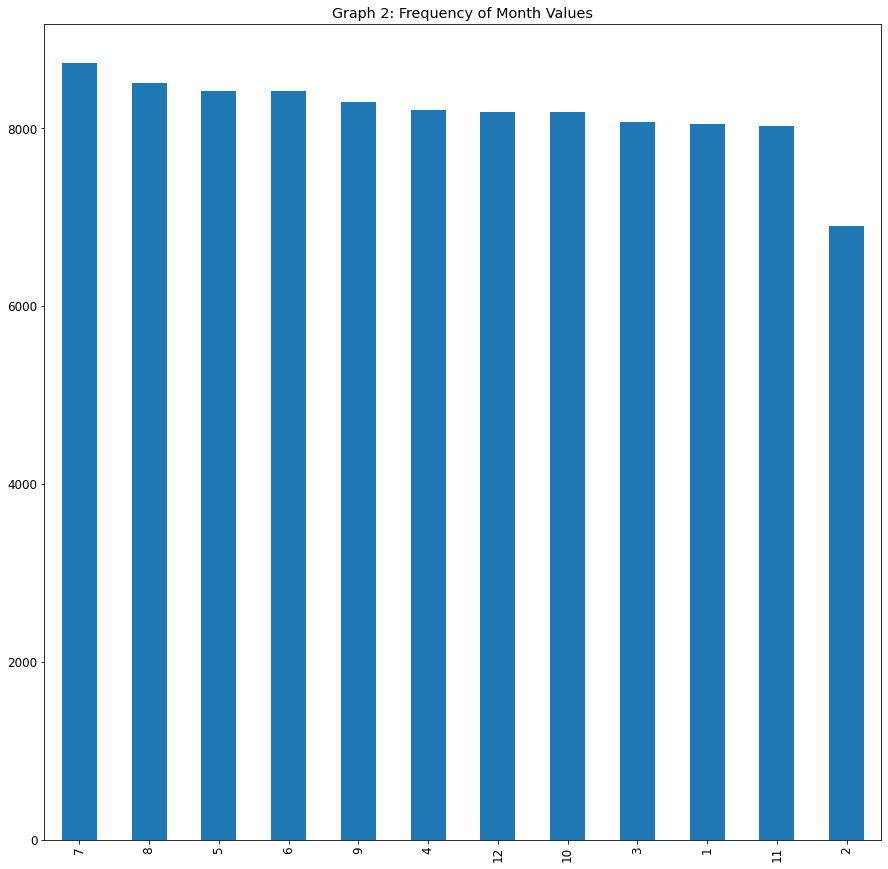

In [ ]:
bplt = df['Month'].value_counts().plot.bar(title = "Graph 2: Frequency of Month Values")

There appears to be a drop in gun related deaths in the last 3 and first 3 months of the year. This could partly be attributed to the holiday atmosphere that is usually observed during that time. People might be less suicidal and homocidal during these months since more time is spent with family, friends and loved ones.

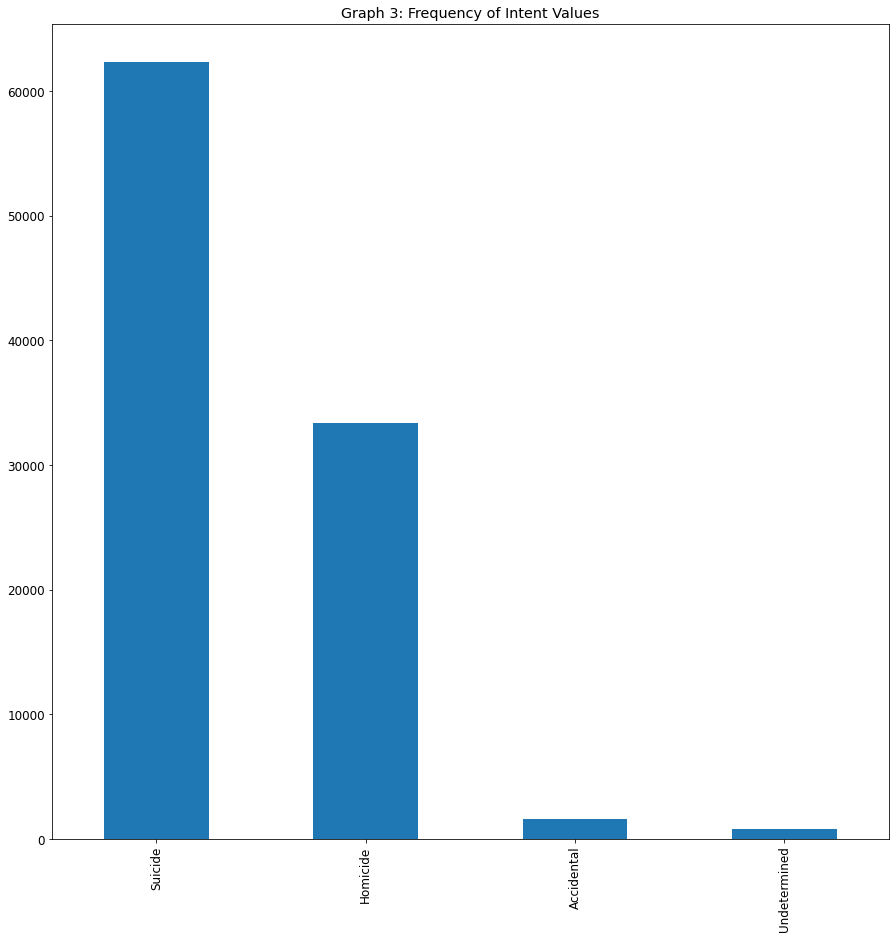

In [ ]:
bplt = df['Intent'].value_counts().plot.bar(title = "Graph 3: Frequency of Intent Values")

This data doesn't cover the same year but it does somewhat confirm the trend that was pointed out by Pew Research. The majority of gun related deaths in America are suicides.

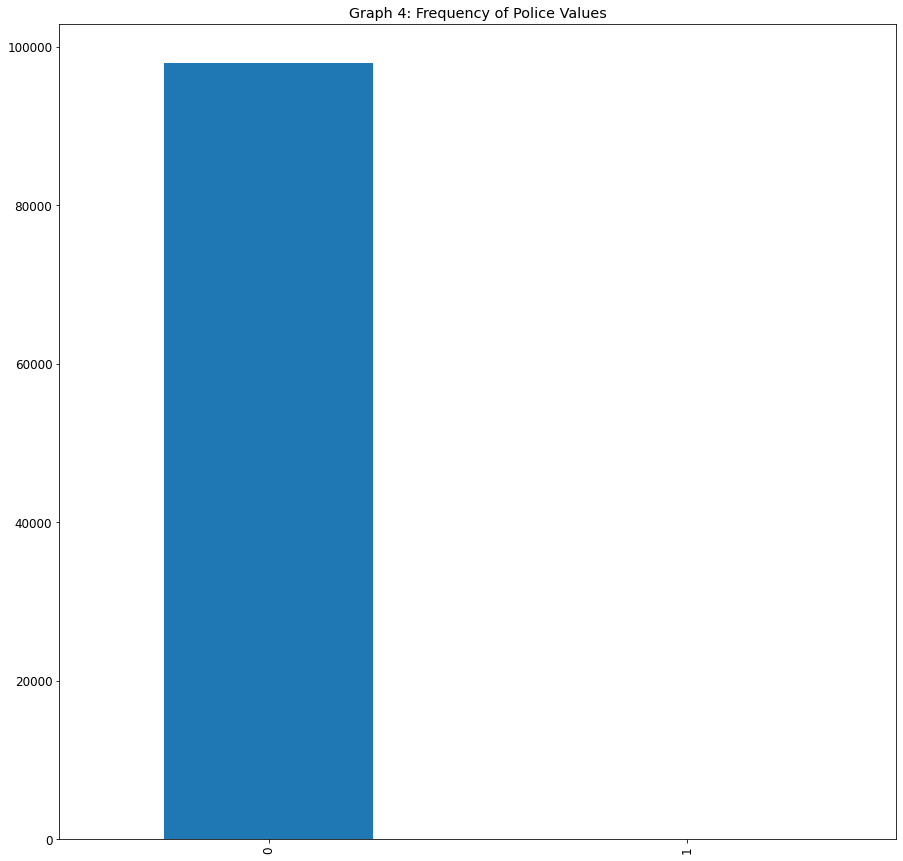

In [ ]:
bplt = df['Police'].value_counts().plot.bar(title = "Graph 4: Frequency of Police Values")

In [ ]:
df['Police'].value_counts()

0    97995
1       19
Name: Police, dtype: int64

This graph is odd. Just for clarification, the values of this graph represent the amount of gun deaths that were caused by a police officer. At a glance, it seems there are no shooting deaths caused by police officers. The scaling of the graph makes it seem like this is the case. In the cell above, we have included a value count for this graph. As it turns out, there is a small amount of shooting deaths caused by police officers. Reportedly, there have only been 19 shooting deaths caused by police officers over these 3 years. This seems oddly low. Perhaps errors have been made in the identification and classification of numerous gun related deaths.

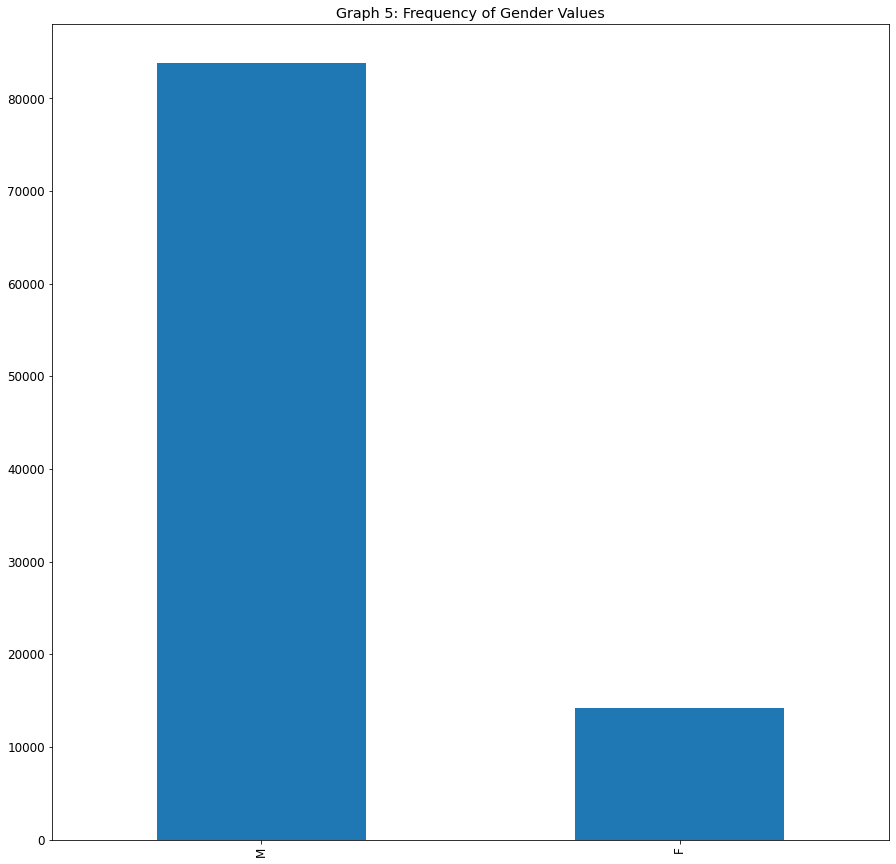

In [ ]:
bplt = df['Gender'].value_counts().plot.bar(title = "Graph 5: Frequency of Gender Values")

The vast majority of the victims of gun related deaths in America are men. This isn't too surprising since men have a higher suicide rate are are more commonly the victim of violent crimes.

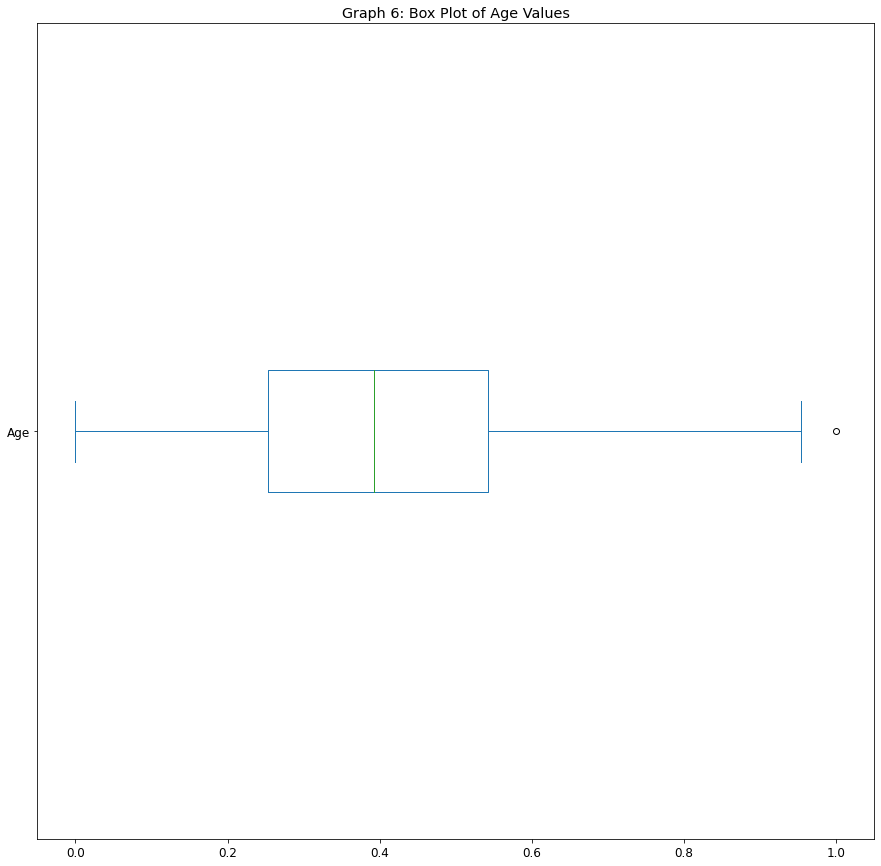

In [ ]:
#Normalize Age values
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min()) 

#Change Age values to numeric so it can be represented on a box plot
df['Age'] = pd.to_numeric(df['Age']) #Convert fare column from string to numeric
plt.title('Graph 6: Box Plot of Age Values')
df['Age'].plot(kind='box', vert=False);

Surprisingly, there is only 1 outlier. That is the 107 year old victim. One would expect children of young ages and the eldery to be outliers when it comes to gun related deaths. Sadly this is not the case.

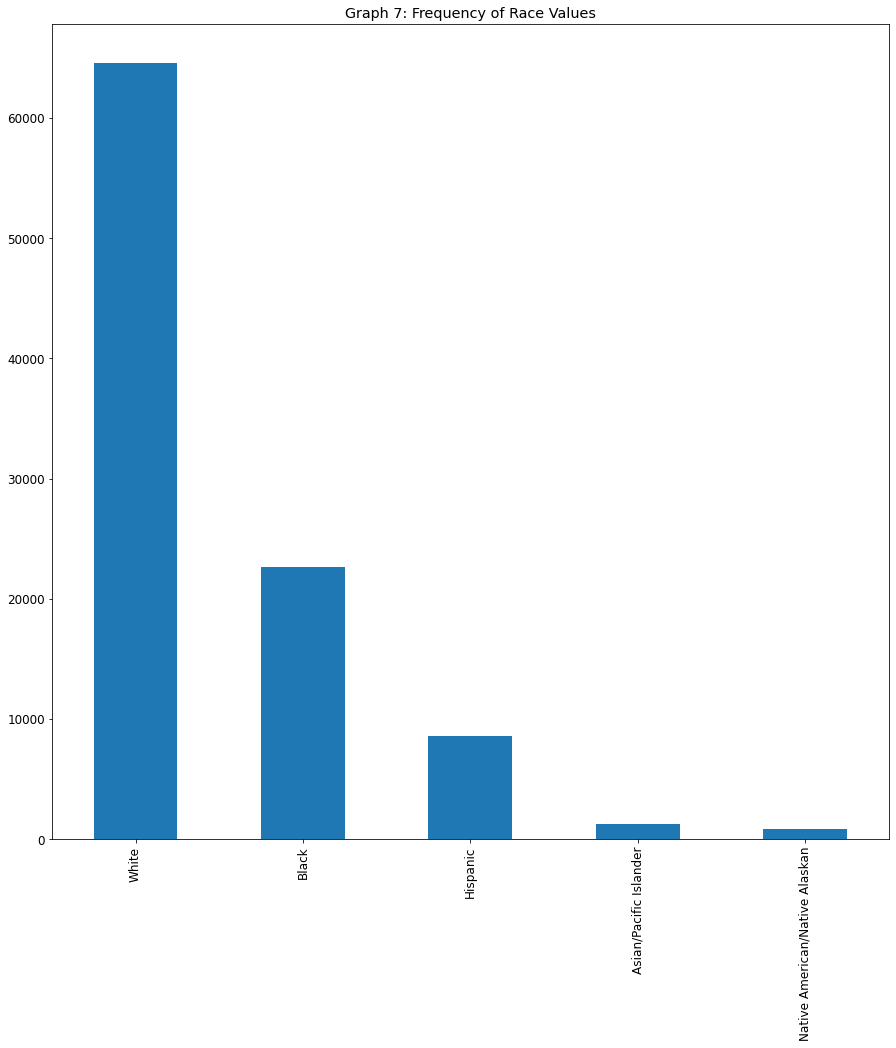

In [ ]:
bplt = df['Race'].value_counts().plot.bar(title = "Graph 7: Frequency of Race Values")

The vast majority of the victims of gun related deaths are white, followed by blacks and hispanics. This isn't too surprising since white people make up the majority of the American population at about 60%. What is peculiar about this graph is that black people are second place and hispanics are third place. One expect these 2 groups to have swapped positions since hispanics make up about 18% of the population while black people make up about 13%.

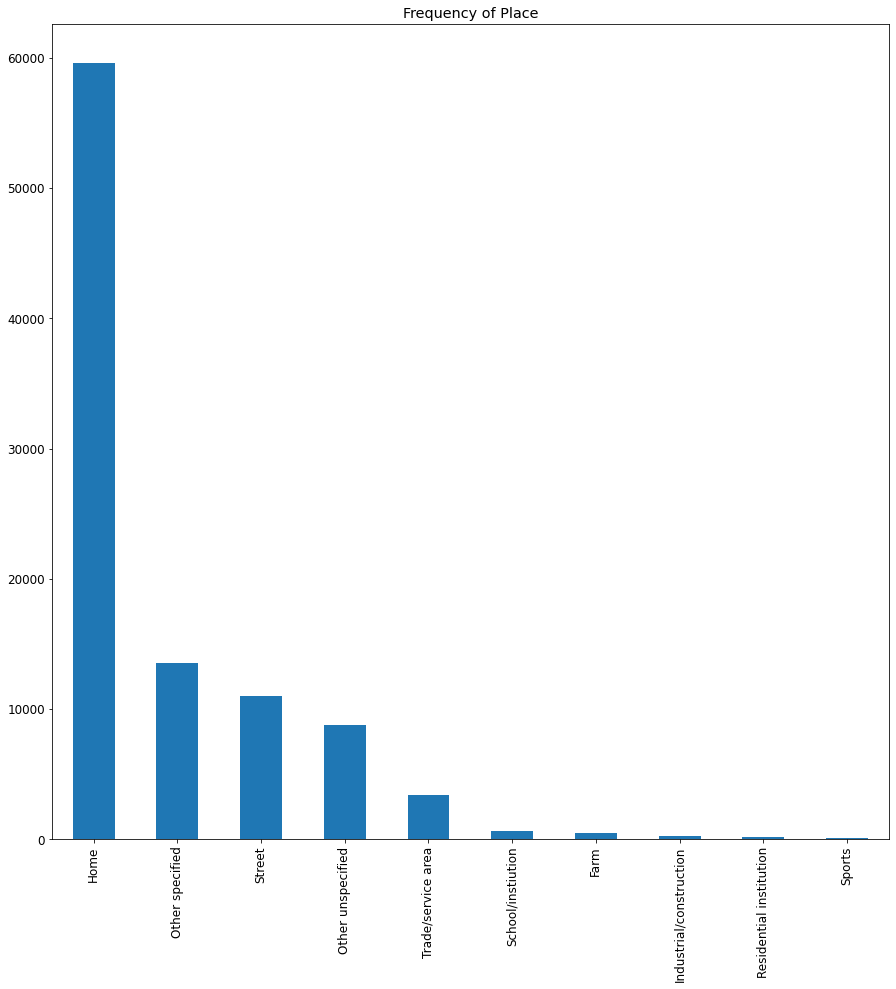

In [ ]:
bplt = df['Place'].value_counts().plot.bar(title = "Frequency of Place")
bplt;

The vast majority of gun related deaths takes place in the victims home. Sadly, this isn't surprising since statistically speaking, an individual is most likely to shoot a family member. Additionally, most murders are commited by a victim's family member or friend. Another explenation for this could be due to the fact that the majority of gun related deaths were suicides. It makes sense that the victim would commit suicide at home. 

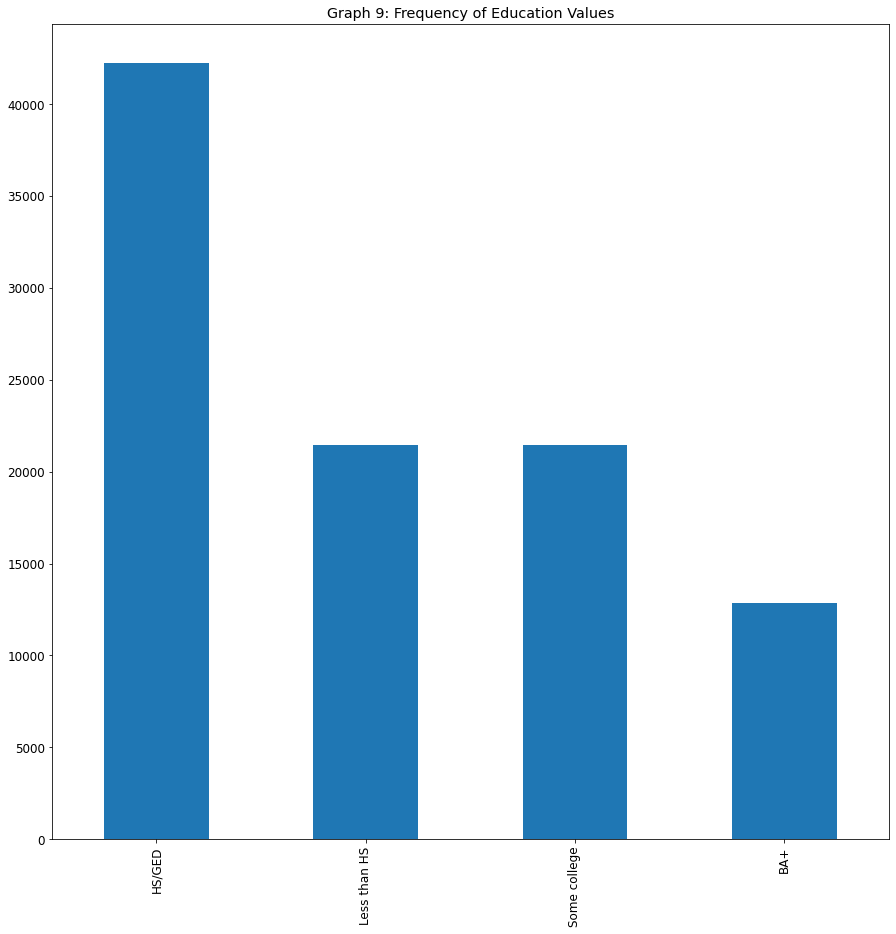

In [ ]:
bplt = df['Education'].value_counts().plot.bar(title = "Graph 9: Frequency of Education Values")

The majority of the victims of gun related deaths have a highschool education. This is to be expected since the majority of the population has attained this level of education. As the level of education increases, the amount of gun related deaths decreases. 

In [ ]:
#We opted to change the categorical values to numeric values here to avoid the values being altered for the graphs above.
#We had to convert the values so they can be represented in the heat map below.
#The values of Intent, Gender, Race, Place and Education all have to be changed since they are not numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98014 entries, 1 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       98014 non-null  int64  
 1   Month      98014 non-null  int64  
 2   Intent     98014 non-null  object 
 3   Police     98014 non-null  int64  
 4   Gender     98014 non-null  object 
 5   Age        98014 non-null  float64
 6   Race       98014 non-null  object 
 7   Place      98014 non-null  object 
 8   Education  98014 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ MB


In [ ]:
#Data conversion
#Since we are trying to predict suicides, all non suicide values in the Intent column will be converted to 0
df['Intent'].replace(['Suicide', 'Homicide', 'Accidental', 'Undetermined'], [1, 0, 0, 0], inplace=True)
df['Gender'].replace(['F', 'M'], [0, 1], inplace=True)
df['Race'].replace(['Asian/Pacific Islander', 'Native American/Native Alaskan', 'Black', 'Hispanic', 'White'], [0, 1, 2, 3, 4], inplace=True)
df['Place'].replace(['Farm', 'Home', 'Industrial/construction', 'Other specified',
       'Other unspecified', 'Residential institution',
       'School/instiution', 'Sports', 'Street', 'Trade/service area'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
df['Education'].replace(['BA+', 'HS/GED', 'Less than HS', 'Some college'], [0, 1, 2, 3], inplace=True)

In [ ]:
#Confirm proper comversion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98014 entries, 1 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       98014 non-null  int64  
 1   Month      98014 non-null  int64  
 2   Intent     98014 non-null  int64  
 3   Police     98014 non-null  int64  
 4   Gender     98014 non-null  int64  
 5   Age        98014 non-null  float64
 6   Race       98014 non-null  int64  
 7   Place      98014 non-null  int64  
 8   Education  98014 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 7.5 MB


In [ ]:
#A look at the summary of our statistics after all alterations have been made
df.describe()

,Year,Month,Intent,Police,Gender,Age,Race,Place,Education
count,98014.000000,98014.000000,98014.000000,98014.000000,98014.000000,98014.000000,98014.000000,98014.000000,98014.000000
mean,2013.000571,6.567837,0.635521,0.000194,0.855327,0.410283,3.371243,2.654784,1.524721
std,0.816134,3.406955,0.481286,0.013922,0.351773,0.182458,0.950858,2.567421,0.974403
min,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,0.000000,1.000000,0.252336,2.000000,1.000000,1.000000
50%,2013.000000,7.000000,1.000000,0.000000,1.000000,0.392523,4.000000,1.000000,1.000000
75%,2014.000000,9.000000,1.000000,0.000000,1.000000,0.542056,4.000000,3.000000,2.000000
max,2014.000000,12.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,3.000000


In [ ]:
#Isolate and display the mean values of each attribute
df.groupby('Intent').mean()

,Year,Month,Police,Gender,Age,Race,Place,Education
Intent,,,,,,,,
0,2012.982533,6.692420,0.000532,0.843215,0.307492,2.673049,3.836105,1.622019
1,2013.010917,6.496388,0.000000,0.862273,0.469235,3.771665,1.977284,1.468920


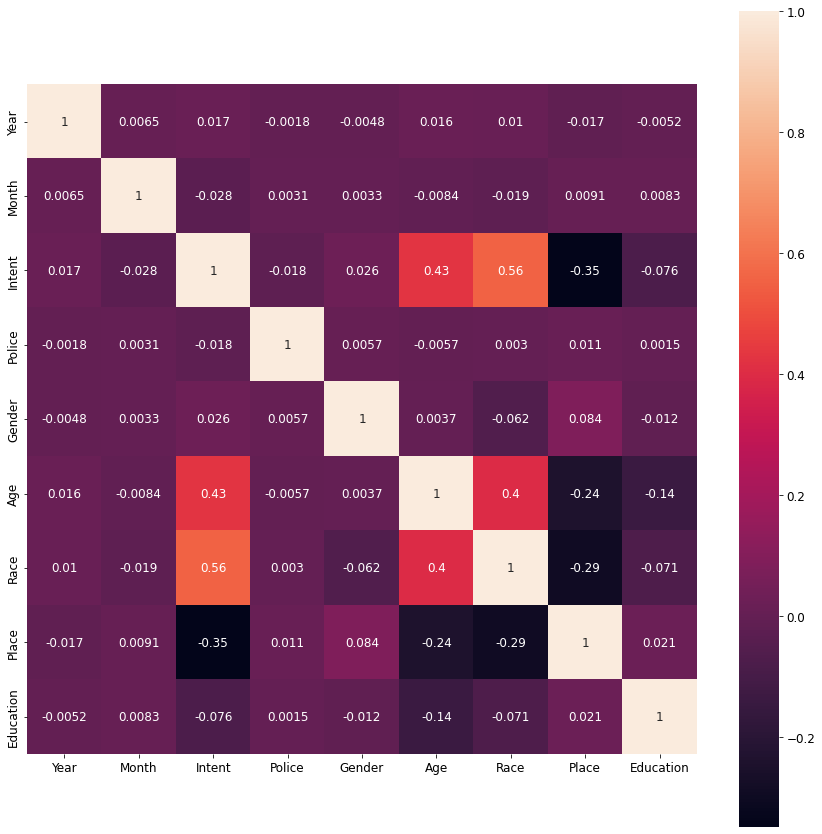

In [ ]:
#Graphical and Numerical representaion of correlation between attributes
corr = df.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## **Preliminary Conclusion**
As we can see from the heat map, there aren't too many attributes that are correlated so we can expect most of the attributes will contribute unique data to our models. Age and Race are highly correlated with Intent. This is expected since cetrain demographics are more likely to be involved in gun culture, exposure and violence. Age and race share a decent level of correlation with each other as well. These correlations are to be expected because the graphs, if taken together, point to certain demographic groups that serves as the majority of gun related deaths. That would be black and white men of most ages. We can expect that either age or race will not show up as a selected attribute during feature selection since they contribute similar data to any created model.

One odd observation is the negative correlation between Intent and Place. One would expect a higher amount of correlation between these 2 attributes since we know the majority of gun related deaths takes place in the victim's home. We don't expect year to come up as a selected feature since gun violence happens regularly throughout the doccumented 3 years. Police is also not likely to come up as a selected feature since such a small number of victims in the data were actually shot by police. Education is the last of the attributes that are not expected to show up during feature selection because the distribution of victims in this category seem to align with the distribution of education in America.

There was 1 correlation value that defied expectations. This was the Place attribute. Place did not correlate with Age, Race or Gender. Certain demographic groups tend to congregate in different places in society. This is a real world link between location, age, race and gender. Surprisingly, the heat map disagrees.

## **Part 5a: K-Best Feature Selection**
In the next section, we will use K-best and a Chi Squared test to select features for 2 different models.

In [ ]:
#K-Best feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = df['Intent']
features = df.drop('Intent',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", df.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['Year', 'Month', 'Intent', 'Police', 'Gender', 'Age', 'Race', 'Place',
       'Education'],
      dtype='object') 

Chosen features:  Index(['Month', 'Age', 'Race', 'Place', 'Education'], dtype='object') 



array([2.74681698e+01, 7.52210342e+01, 3.31462218e+01, 6.66865547e+01,
       2.18110892e+04, 4.38739025e+04, 1.35451942e+04, 5.63696113e+02])

In [ ]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

      Chosen
0      Month
1        Age
2       Race
3      Place
4  Education


## **Part 5b: Chi-Square Feature Selection**

In [ ]:
#Chi-Square feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df.drop('Intent',1)
y = df['Intent']

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

In [ ]:
feature_score = pd.DataFrame()

for i in range(X.shape[1]):
    new = pd.DataFrame({'Features' : X.columns[i],
                        'Score' : fit.scores_[i]}, index=[i])
    
    feature_score = pd.concat([feature_score, new])

In [ ]:
#The 5 attributes with the higest scores will be selected
feature_score

,Features,Score
0,Year,0.009086
1,Month,132.837583
2,Police,33.129269
3,Gender,9.641395
4,Age,1447.643011
5,Race,8128.155184
6,Place,29548.551881
7,Education,349.016536


## **Part 6.1 - Logistic Regression Model Built From Original Data**
We used all of our attributes in the logit model to serve as a baseline measurement of accurate prediction.

In [ ]:
#Form model1 from all of the attributes in the original dataframe
y, X = dmatrices('Intent ~ C(Year) + C(Month) + C(Police) + C(Gender) + Age + C(Race) + C(Place) + C(Education)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model1 = LogisticRegression()
model1 = model1.fit(X, y)
model1.score(X, y) #Score of model1

0.8369824718917706

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make predictions for survival
predicted = model1.predict(X_test)
probs = model1.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions1'] = predicted

filtered_dt = dt[dt['predictions1'] == 1]
filtered_dt

,0,1,predictions1
1,0.228998,0.771002,1.0
2,0.193154,0.806846,1.0
4,0.031828,0.968172,1.0
5,0.150185,0.849815,1.0
7,0.129177,0.870823,1.0
...,...,...,...
29400,0.267977,0.732023,1.0
29401,0.266361,0.733639,1.0
29402,0.023496,0.976504,1.0
29403,0.177574,0.822426,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))
print("\n\nConfusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\n\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Accuracy: 0.8330896106104404
Roc: 0.8769649803214535


Confusion Matrix:

 [[ 7544  3144]
 [ 1764 16953]]


Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.71      0.75     10688
         1.0       0.84      0.91      0.87     18717

    accuracy                           0.83     29405
   macro avg       0.83      0.81      0.81     29405
weighted avg       0.83      0.83      0.83     29405



## **Part 6.2 - Logistic Regression Model Built From Selected Features**
Both K-Best and the Chi Square test selected the same 5 attributes. We will now see if feeding those 5 attributes into a logistic regress will yield better results.

In [ ]:
#Form model2 from all of the attributes in the original dataframe
y, X = dmatrices('Intent ~ C(Month) +  Age + C(Race) + C(Place) + C(Education)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model2 = LogisticRegression()
model2 = model2.fit(X, y)
model2.score(X, y) #Score of model2

0.8353602546574979

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make predictions for survival
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions2'] = predicted

filtered_dt = dt[dt['predictions2'] == 1]
filtered_dt

,0,1,predictions2
1,0.125544,0.874456,1.0
2,0.219125,0.780875,1.0
4,0.041987,0.958013,1.0
5,0.172970,0.827030,1.0
6,0.329814,0.670186,1.0
...,...,...,...
29400,0.153229,0.846771,1.0
29401,0.300790,0.699210,1.0
29402,0.030951,0.969049,1.0
29403,0.203488,0.796512,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))
print("\n\nConfusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\n\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Accuracy: 0.8317292977384798
Roc: 0.8702529950717255


Confusion Matrix:

 [[ 7465  3223]
 [ 1725 16992]]


Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75     10688
         1.0       0.84      0.91      0.87     18717

    accuracy                           0.83     29405
   macro avg       0.83      0.80      0.81     29405
weighted avg       0.83      0.83      0.83     29405



## **Part 6.3 - Decision Tree Regression Model**
It is interesting to point out that this model placed a heavier numerical weight on a similar set of attributes to the ones selected by K-Best and the Chi Square test. Both forms of feature selection picked Month, Age, Race, Place amd Education. The Tree Regressor placed heavy weights on Race, Age, Month, Place and Year. Education followed as a near 6th place.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=None)
decision_tree.fit(features, target)

predictors = features.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Police       0.000439
Gender       0.017716
Education    0.035047
Year         0.057805
Place        0.062858
Month        0.131711
Age          0.201703
Race         0.492721
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.3)
    
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
    
print("Test_score : ", r2_score(y_test, y_pred))

Test_score :  0.3896943956452734


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))
print("\n\nConfusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\n\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Accuracy: 0.5556538003740861
Roc: 0.5054498822095147


Confusion Matrix:

 [[ 3412  7288]
 [ 5778 12927]]


Classification Report:

               precision    recall  f1-score   support

           0       0.37      0.32      0.34     10700
           1       0.64      0.69      0.66     18705

    accuracy                           0.56     29405
   macro avg       0.51      0.50      0.50     29405
weighted avg       0.54      0.56      0.55     29405



## **Part 6.4 - Random Forest Model Built From Original Data**
Random forest is a flexible, easy-to-use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most-used algorithms, due to its simplicity and diversity (it can be used for both classification and regression tasks).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Year', 'Month','Police','Gender', 'Age', 'Race','Place','Education']]
y = df['Intent']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Test Score:", metrics.r2_score(y_test, y_pred))
plt.show()

Test Score: 0.11982244438835088


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('ROC: ',roc_auc_score(y_test, y_pred))

Accuracy:  0.7963611630675055
ROC:  0.7716876962935804


In [ ]:
#Generate performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
print("\n", classification_report(y_test, y_pred))

Predicted     0      1
Actual                
0          7282   3406
1          2582  16135

               precision    recall  f1-score   support

           0       0.74      0.68      0.71     10688
           1       0.83      0.86      0.84     18717

    accuracy                           0.80     29405
   macro avg       0.78      0.77      0.78     29405
weighted avg       0.79      0.80      0.79     29405



## **Part 6.5 - Random Forest Model Built From Selected Features**
Just as we did with the logit model, we will now build a random forest with only the attributes highlighted by feature selection.

In [ ]:
X = df[['Month', 'Age', 'Race','Place','Education']]
y = df['Intent']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Test Score:", metrics.r2_score(y_test, y_pred))
plt.show()

Test Score: 0.18052941340431794


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('ROC: ',roc_auc_score(y_test, y_pred))

Accuracy:  0.8104063934704983
ROC:  0.7802721812345816


In [ ]:
#Generate performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
print("\n", classification_report(y_test, y_pred))

Predicted     0      1
Actual                
0          7160   3528
1          2047  16670

               precision    recall  f1-score   support

           0       0.78      0.67      0.72     10688
           1       0.83      0.89      0.86     18717

    accuracy                           0.81     29405
   macro avg       0.80      0.78      0.79     29405
weighted avg       0.81      0.81      0.81     29405



## **Part 6.6 - Bagging and Pasting Ensemble Model**
Both bagging and pasting trains predictors on a different random subset of the training data. At the end, when all the predictors are trained, the ensemble can predict new data by simply combining the prediction of all the predictors the same as the hard voting classifier(As mode in statistics). Most of the time ensemble has the same bias but less variance than an individual predictor trained on the original training data.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    max_samples=100, bootstrap=True, random_state=101)

In [ ]:
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

print("Test Score:", metrics.r2_score(y_test, y_pred))
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('ROC: ',roc_auc_score(y_test, y_pred))
plt.show()

Test Score: 0.25828725023106525
Accuracy:  0.8283965312021765
ROC:  0.7998220130903444


In [ ]:
print("\n", classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.81      0.70      0.75     10688
           1       0.84      0.90      0.87     18717

    accuracy                           0.83     29405
   macro avg       0.82      0.80      0.81     29405
weighted avg       0.83      0.83      0.83     29405



## **Part 7 - Conclusion**
The model that outperformed the others by a slight margin was model number 1, the Logistic Regression model that used all of the attributes. This model has an accuracy of 0.8330896106104404 and Roc of 0.8769649803214535. Model 2 was a close 2nd place. Each of the models performed accurately in some regard. What this report focused on was the idea that the most accurate model would be the one that utulizes the attributes that are the most important indetermining an individual's likelyhood to commit suicide by shooting themselves. This was not the case.

Month, Age, Race, Place and Education attributes were selected by both of the feature selection methods. When these five attributed were fed into a logistic regression model, the performance metrics went down slightly when compared to the model that used all the attributes. The opposite is true for the Random Forest models. When the five selected attributes were used to create a Random Forest, the performance metrics slightly increased when compared to using all of the attributes. We expected to see a notable increase in model performance if we used the 5 selected attributes. The idea here was to see an increase in performance by cutting out data that doesn't contibute unique data. The results we received were marginal and conflicting. It is unknown why this happened.

One other observation is that the decision tree placed heavy emphasis on Year, Place, Month, Age and Race. This list has four of the five attributes that were selected by K-Best and the Chi Square test. This is somewhat notable. Although the theory did not pan out as we expected, some knowledge can still be gleamed from the data and selected features. Clearly age and race play a major factor in gun violence since certain demographics have a higher degree of exposure and indulgence in gun use, whether it is for recreational or criminal use. Timing is also important. According to the data, people tend to be more isolated during the non holiday months. This might lead individuals to be more violent.

The place in which the crime takes place matters as well. Most people are shot in their homes. This aligns nicely with the fact that most shootings and murders are commited by a friend or family member. As for education, it would be easy to say that people of with a Highschool diploma are more likely to be involved in gun violence but it is more likely that this observation is simply a consequence of how education is distributed among the American population. The one attribute that defied expectation is Gender. We expected this to show up since males were more likely to be the victim of a gun related death unfortunately. It is unclear as to why this is the case. More data and further investigation is needed to draw a more concrete conclusion.

### References

https://fivethirtyeight.com/features/gun-deaths/

https://github.com/fivethirtyeight

https://www.pewresearch.org/fact-tank/2022/02/03/what-the-data-says-about-gun-deaths-in-the-u-s/

https://datatofish.com/random-forest-python/

https://www.analyticsvidhya.com/blog/2021/12/a-detailed-guide-to-ensemble-learning/#h2_3